In [29]:
import numpy as np
import scipy 
import os
import matplotlib as mlp
import matplotlib.pyplot as plt 



x_l = 0
x_r = 1
y_l,y_r = x_l,x_r
def read(stderr_file):
    with open(stderr_file, "r") as err:
        stderr_content = err.read()
        # 在这里对 stderr_content 进行处理
        sss = stderr_content.split('\n')[3:-2]
        results = {'time': [],'iteration': [],'value': []}
        for line in sss:
            parts = line.strip().split()
            time = float(parts[1])
            iteration = int(parts[-2])
            value = float(parts[-1])
            results['time'].append(time)
            results['iteration'].append(1+iteration)
            results['value'].append(value)
    return results
def draw(p,N,T=1):
    result_file = f'./Order_{p}_Mesh_{N}/solution/T_{T}_N_{N}.txt'
    # rorder_file = f'./stdout_Diric4_%d_%d_1E8.txt'%(p,N)
    data = np.loadtxt(result_file)
    x,y,z, uh,us, vh,vs, wh,ws, ph,ps = data.T
    # idx = np.argsort(x)
    # x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = \
    #     (val[idx] for val in (x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es))

    plt.figure(figsize=(7,3.2),dpi=200)

    plt.subplot(1,2,1)
    plt.tripcolor(x,y,uh,cmap='jet',)
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    # plt.title(r'$E_h(t=\infty)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(1,2,2)
    plt.tripcolor(x,y,uh-us,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(x_l,x_r,6))
    plt.xticks(np.linspace(x_l,x_r,11),minor=True)
    plt.yticks(np.linspace(y_l,y_r,6))
    plt.yticks(np.linspace(y_l,y_r,11),minor=True)
    plt.grid(which='both')
    # plt.title(r'$E_h(t=\infty)-E(t=\infty)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.tight_layout()
    plt.show()

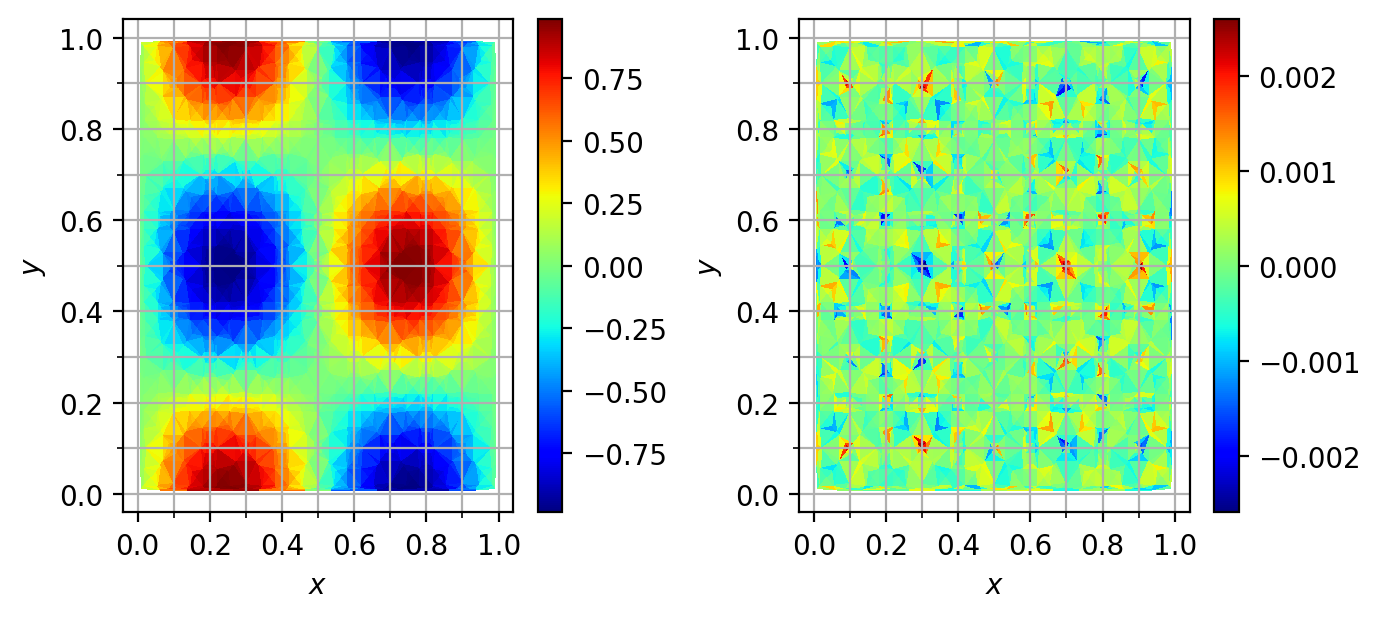

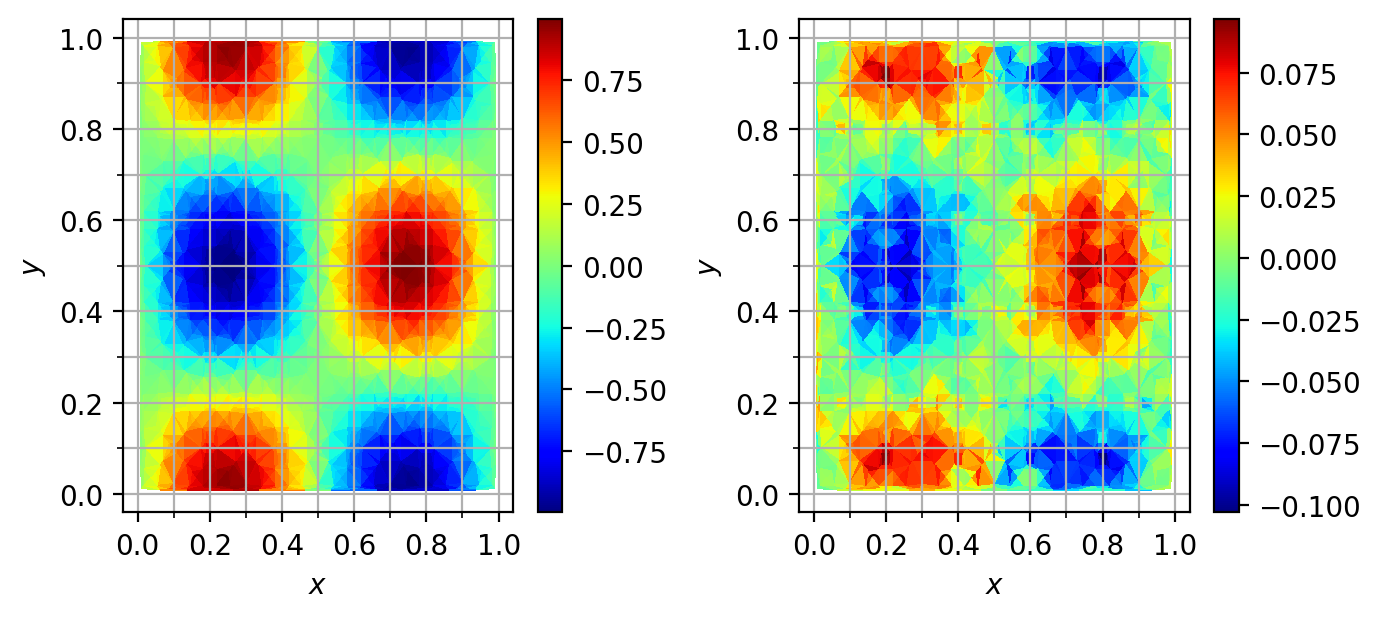

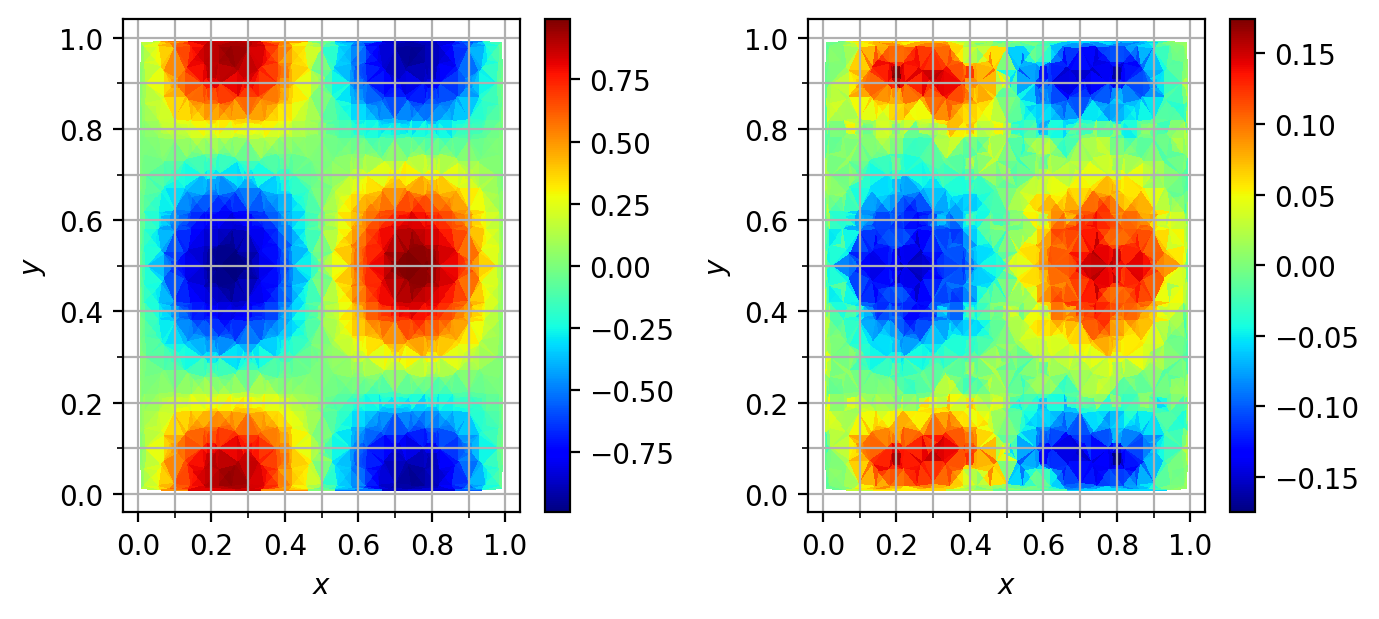

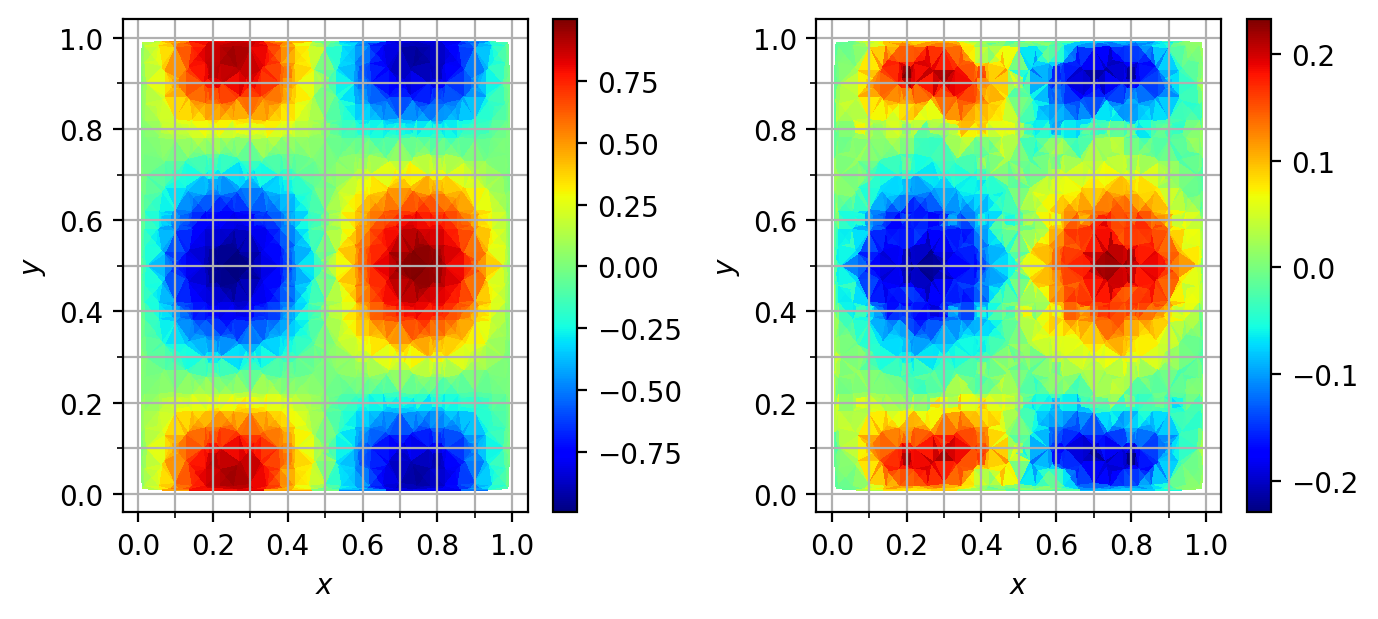

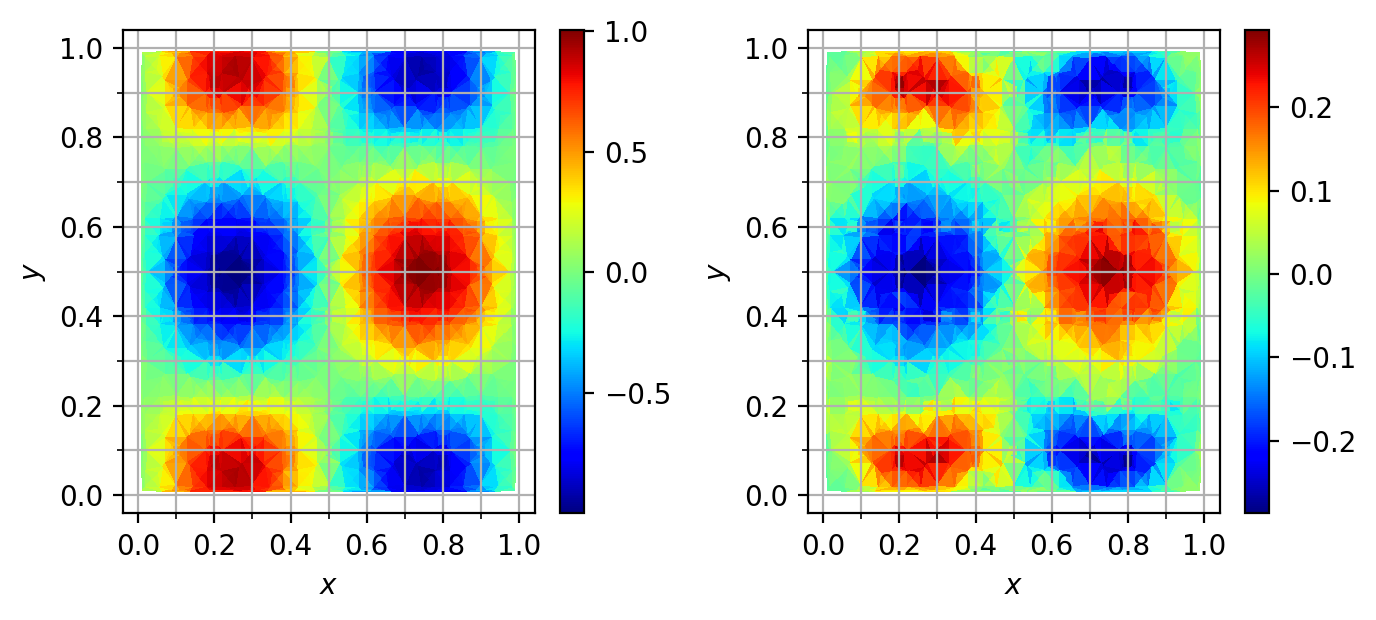

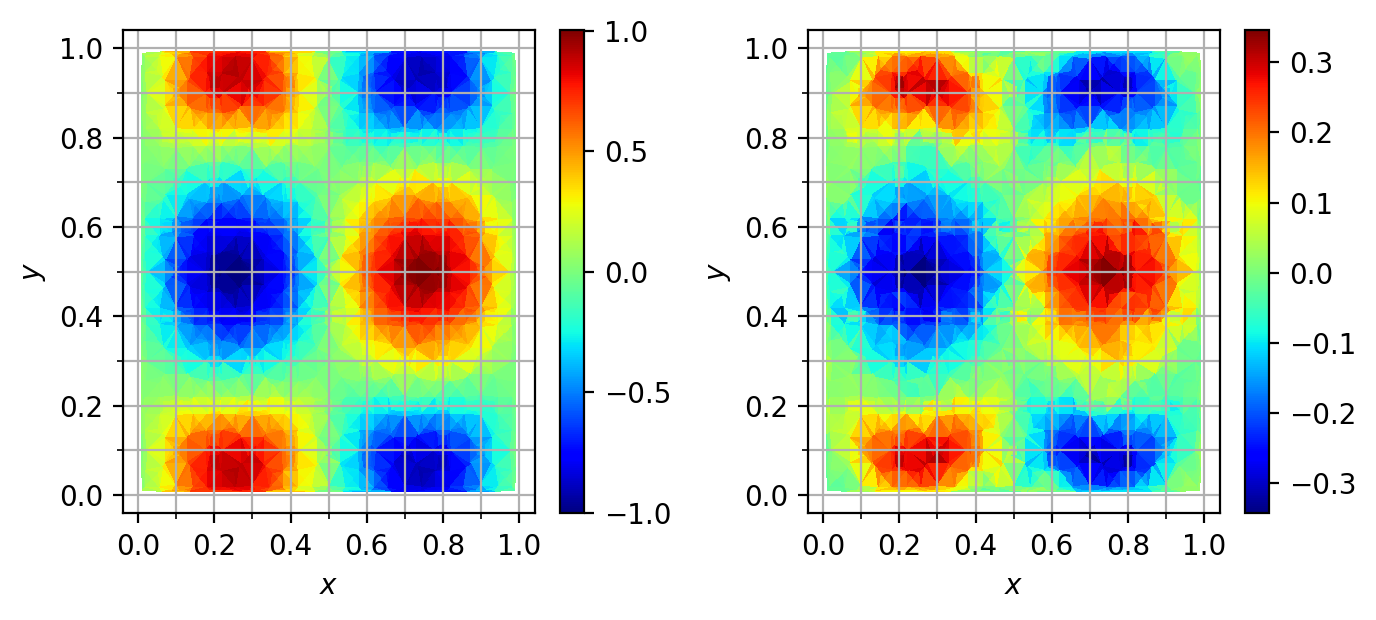

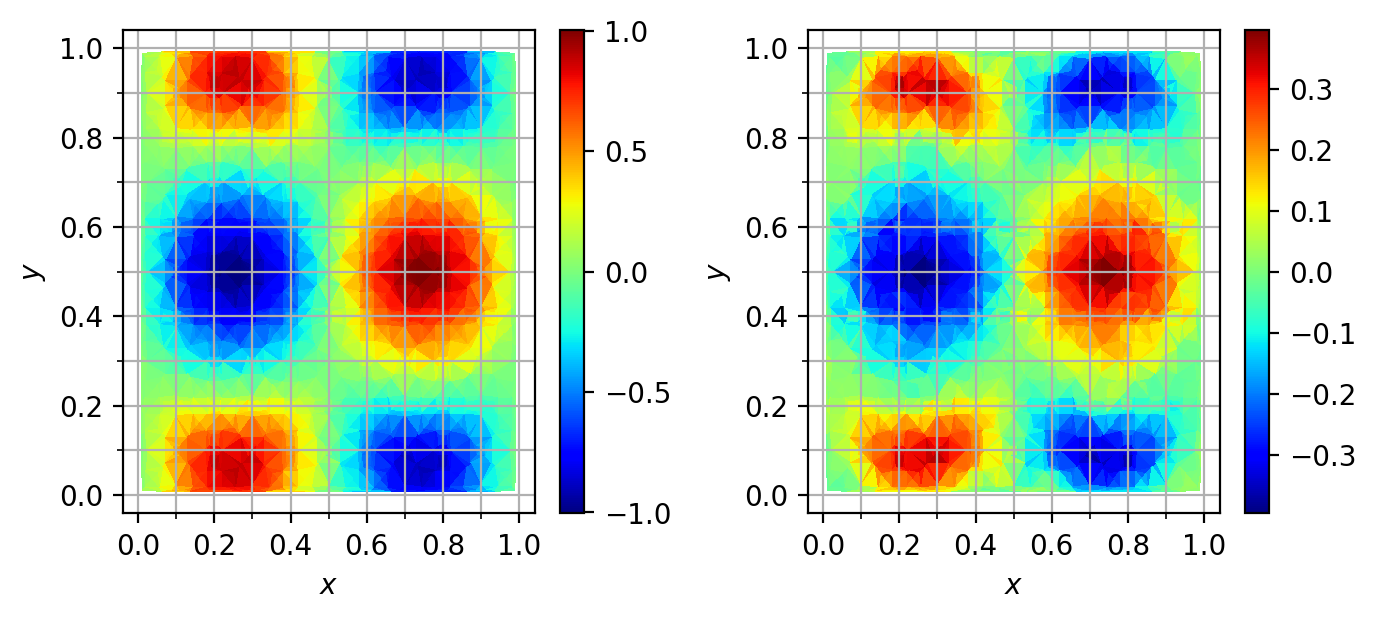

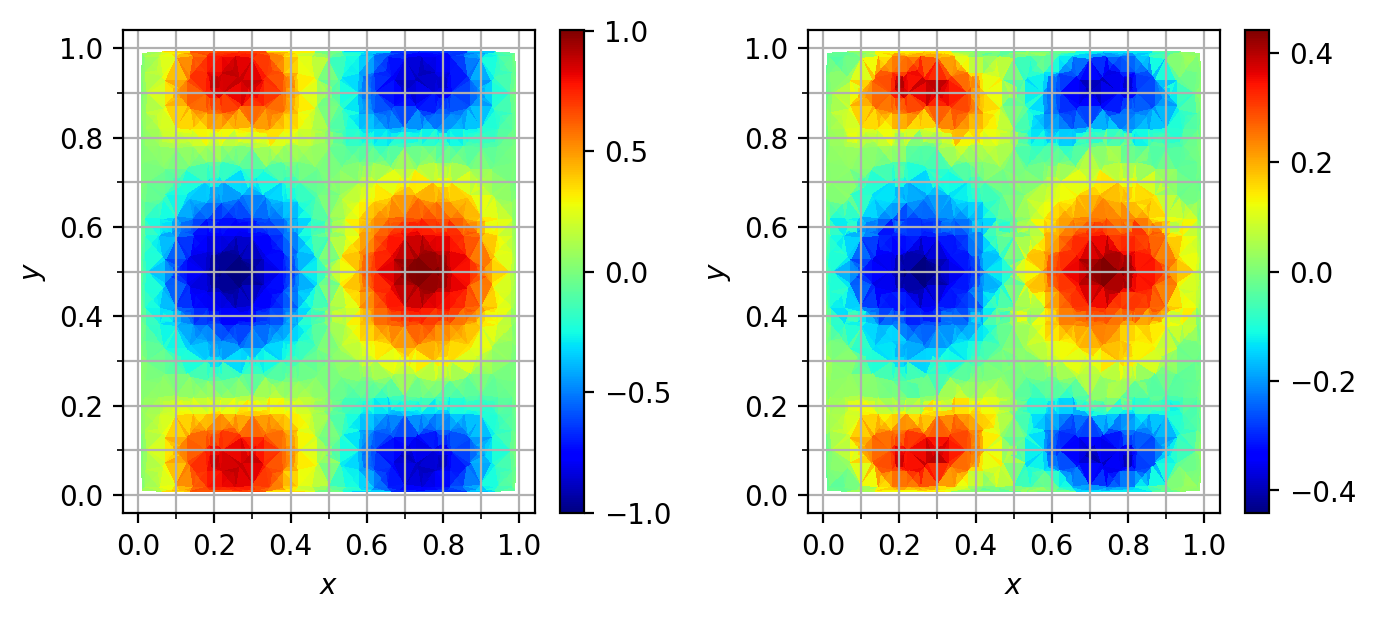

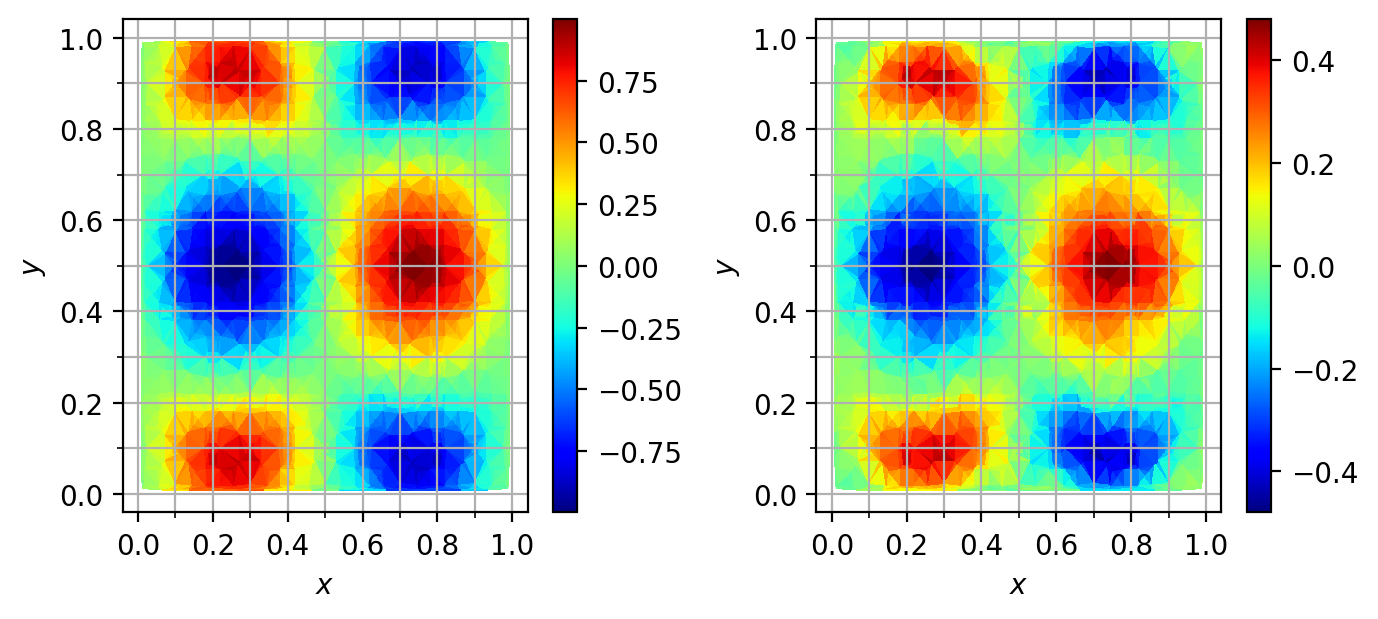

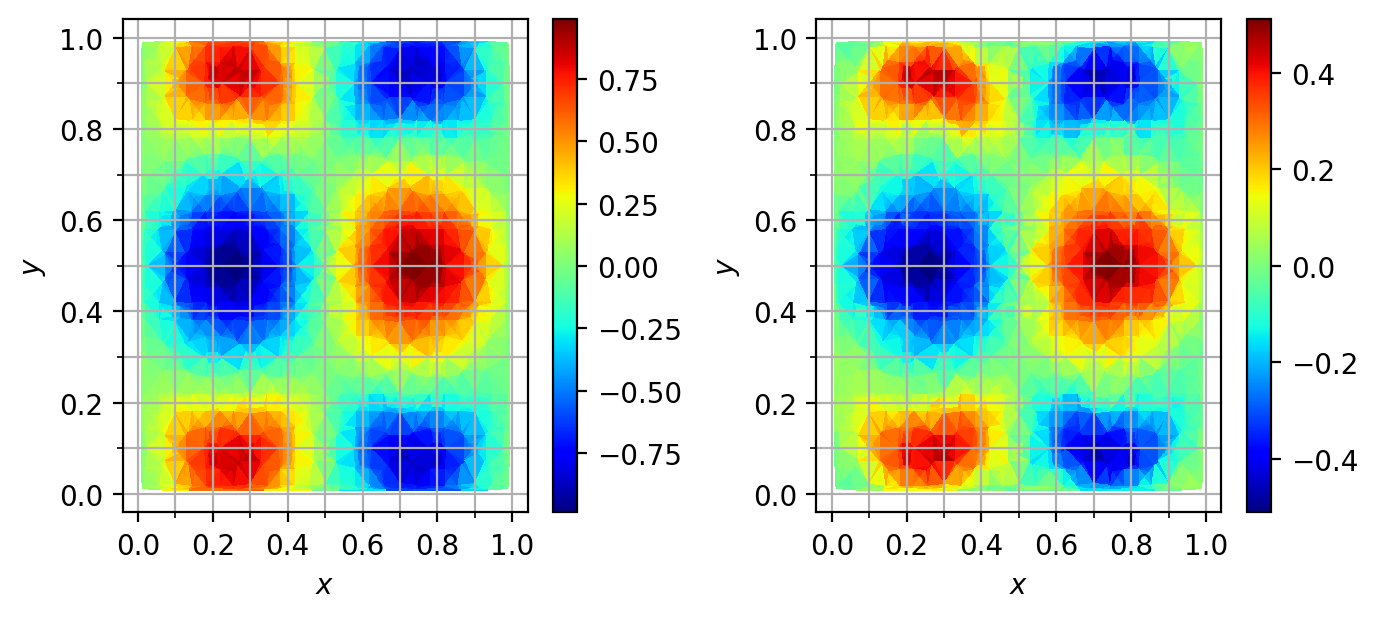

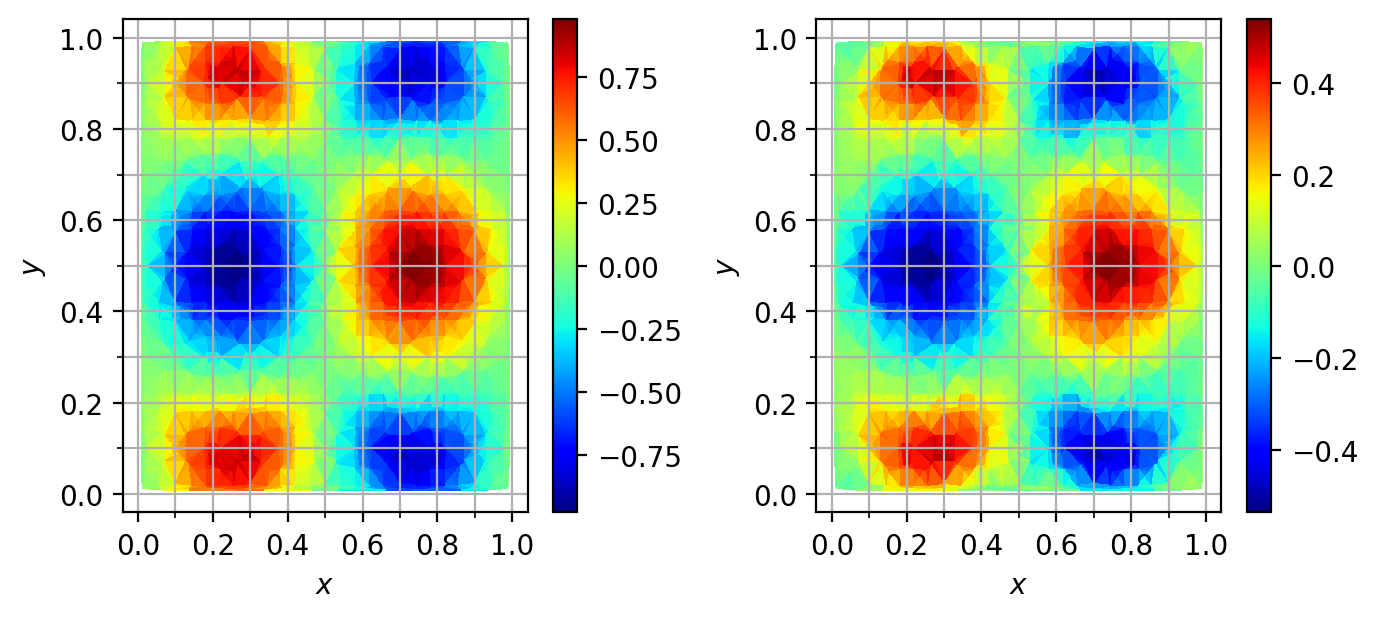

In [30]:
for T in range(11):
    draw(2,5,T) 


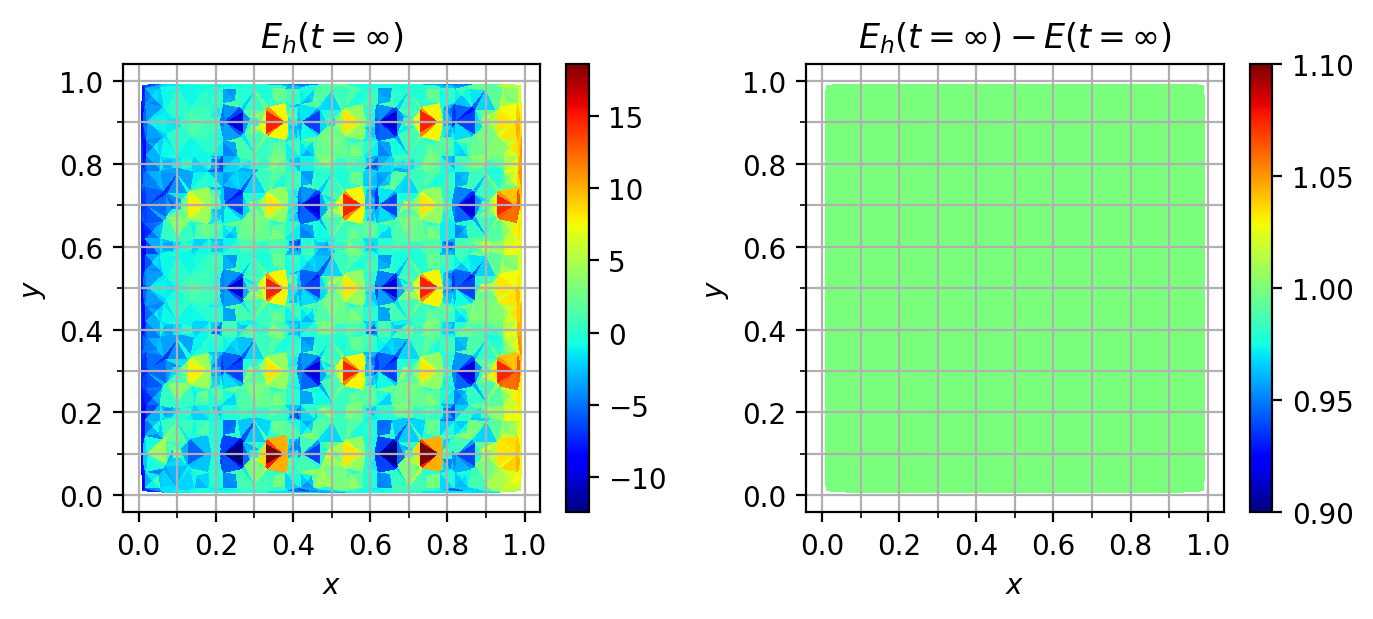

In [ ]:
draw(2,5,0) 


In [ ]:
p = 3
N = 20
T = 0
result_file = f'./Order_{p}_Mesh_{N}/solution/T_{T}_N_{N}.txt'
# rorder_file = f'./stdout_Diric4_%d_%d_1E8.txt'%(p,N)
data = np.loadtxt(result_file)
x,y,z, uh,us, vh,vs, wh,ws, ph,ps = data.T

ps

array([-0.93594805, -0.96747939, -0.98539267, ..., -0.99424112,
       -0.95962517, -0.97027901])

In [ ]:
x,y,ph

(array([0.04818213, 0.039881  , 0.0242194 , ..., 0.98345479, 0.96721   ,
        0.98230549]),
 array([0.03145025, 0.00821251, 0.01250822, ..., 0.9957162 , 0.96840339,
        0.96528558]),
 array([ 1.72872461e-04,  1.58135434e-04, -1.59233029e-04, ...,
         4.06005111e-05, -3.43722721e-04,  5.93780075e-04]))

In [68]:
import numpy as np
import scipy 
import os
import matplotlib as mlp
import matplotlib.pyplot as plt 
import scipy.sparse as spmat
mat = np.loadtxt("A.txt")
idx = np.abs(mat[:,2])>1E-10
row = mat[idx,0].astype(int)
col = mat[idx,1].astype(int)
val = mat[idx,2]
Row = mat[:,0].astype(int).max()+1
mat = spmat.coo_matrix((val,(row,col)), shape=(Row,Row))
mat

<COOrdinate sparse matrix of dtype 'float64'
	with 59392 stored elements and shape (4250, 4250)>

In [43]:
# np.linalg.cond(mat.todense())

In [44]:
1625/25,65/(3*4+1)

(65.0, 5.0)

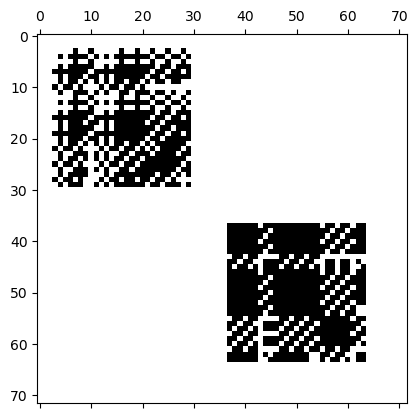

In [70]:
plt.spy(mat.todense()[:72,:72])

In [69]:
mat-mat.T

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (4250, 4250)>

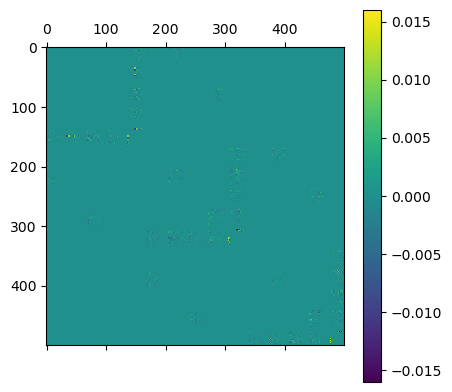

In [63]:
plt.matshow(mat.todense()[:500,:500]-mat.todense()[:500,:500].T)
plt.colorbar()

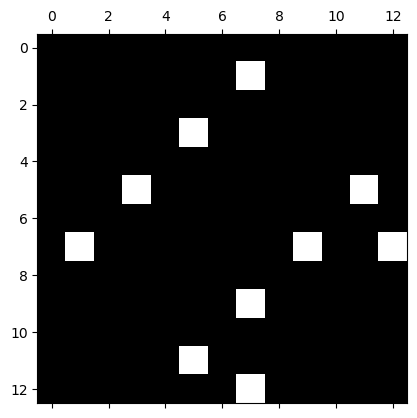

In [41]:
id = np.array([0,3,6,9,1,4,7,10,2,5,8,11,12])
plt.spy(mat.todense()[:13,:13][id,:][:,id])

In [ ]:
mat = np.array(["""0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -0.0266667 1.41115e-18 4.87046e-19 1.13757e-18 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
-0.02 0 0 0 0 0 9.75782e-19 0 0 1.73472e-18 0 0 -5.42101e-19 0 0 -1.6263e-19 0 0 1.84314e-18 0 0 4.33681e-19 0 0 6.50521e-19 0 0 8.13152e-19 0 0 -0.02 4.16291e-19 4.42376e-19 8.76057e-19 
0 -0.02 0 0 0 0 0 9.75782e-19 0 0 1.73472e-18 0 0 -5.42101e-19 0 0 -1.6263e-19 0 0 1.84314e-18 0 0 4.33681e-19 0 0 6.50521e-19 0 0 8.13152e-19 0 0.0133333 -7.05576e-19 -2.43523e-19 -5.68784e-19 
0 0 -0.02 0 0 0 0 0 9.75782e-19 0 0 1.73472e-18 0 0 -5.42101e-19 0 0 -1.6263e-19 0 0 1.84314e-18 0 0 4.33681e-19 0 0 6.50521e-19 0 0 8.13152e-19 0.02 -4.16291e-19 -4.42376e-19 -8.76057e-19 
0.00666667 0 0 -3.25261e-19 0 0 -3.25261e-19 0 0 -6.50521e-19 0 0 1.35525e-19 0 0 4.06576e-20 0 0 -6.77626e-19 0 0 -1.21973e-19 0 0 -2.43945e-19 0 0 -2.43945e-19 0 0 0.00666667 -3.52788e-19 -1.21762e-19 -2.84392e-19 
0 0.00666667 0 0 -3.25261e-19 0 0 -3.25261e-19 0 0 -6.50521e-19 0 0 1.35525e-19 0 0 4.06576e-20 0 0 -6.77626e-19 0 0 -1.21973e-19 0 0 -2.43945e-19 0 0 -2.43945e-19 0 0 0 0 0 
0 0 0.00666667 0 0 -3.25261e-19 0 0 -3.25261e-19 0 0 -6.50521e-19 0 0 1.35525e-19 0 0 4.06576e-20 0 0 -6.77626e-19 0 0 -1.21973e-19 0 0 -2.43945e-19 0 0 -2.43945e-19 0.00666667 -3.52788e-19 -1.21762e-19 -2.84392e-19 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.0166667 -0.03 -3.43785e-19 -5.60626e-19 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
-0.01 0 0 -0.018 0 0 -2.1684e-19 0 0 4.87891e-19 0 0 2.71051e-19 0 0 3.52366e-19 0 0 -4.33681e-19 0 0 2.95445e-18 0 0 -2.1684e-19 0 0 -5.42101e-20 0 0 -0.01 -0.018 3.57549e-19 4.11759e-19 
0 -0.01 0 0 -0.018 0 0 -2.1684e-19 0 0 4.87891e-19 0 0 2.71051e-19 0 0 3.52366e-19 0 0 -4.33681e-19 0 0 2.95445e-18 0 0 -2.1684e-19 0 0 -5.42101e-20 0 0.00666667 0.012 -0.012 -2.83511e-19 
0 0 -0.01 0 0 -0.018 0 0 -2.1684e-19 0 0 4.87891e-19 0 0 2.71051e-19 0 0 3.52366e-19 0 0 -4.33681e-19 0 0 2.95445e-18 0 0 -2.1684e-19 0 0 -5.42101e-20 0.01 0.018 -3.57549e-19 -4.11759e-19 
0.00666667 0 0 -0.00133333 0 0 -0.0133333 0 0 -9.21572e-19 0 0 1.27394e-18 0 0 -1.11131e-18 0 0 5.50233e-18 0 0 -1.35525e-19 0 0 2.03288e-18 0 0 -1.42302e-18 0 0 0.00666667 -0.00133333 -0.0133333 4.67645e-20 
0 0.00666667 0 0 -0.00133333 0 0 -0.0133333 0 0 -9.21572e-19 0 0 1.27394e-18 0 0 -1.11131e-18 0 0 5.50233e-18 0 0 -1.35525e-19 0 0 2.03288e-18 0 0 -1.42302e-18 0 -0.01 0.002 0.008 3.85975e-19 
0 0 0.00666667 0 0 -0.00133333 0 0 -0.0133333 0 0 -9.21572e-19 0 0 1.27394e-18 0 0 -1.11131e-18 0 0 5.50233e-18 0 0 -1.35525e-19 0 0 2.03288e-18 0 0 -1.42302e-18 -0.00666667 0.00133333 0.0133333 -4.67645e-20 
0.00333333 0 0 0.006 0 0 -1.35525e-20 0 0 -1.21973e-19 0 0 -4.74338e-19 0 0 -2.37169e-19 0 0 9.48677e-20 0 0 -9.96111e-19 0 0 4.06576e-20 0 0 1.25361e-19 0 0 0.00333333 0.006 -6.63809e-20 -1.47696e-19 
0 0.00333333 0 0 0.006 0 0 -1.35525e-20 0 0 -1.21973e-19 0 0 -4.74338e-19 0 0 -2.37169e-19 0 0 9.48677e-20 0 0 -9.96111e-19 0 0 4.06576e-20 0 0 1.25361e-19 0 9.76276e-19 1.29418e-18 -1.02656e-18 -0.004 
0 0 0.00333333 0 0 0.006 0 0 -1.35525e-20 0 0 -1.21973e-19 0 0 -4.74338e-19 0 0 -2.37169e-19 0 0 9.48677e-20 0 0 -9.96111e-19 0 0 4.06576e-20 0 0 1.25361e-19 0.00333333 0.006 -6.63809e-20 -1.47696e-19 
0.00333333 0 0 -0.000666667 0 0 0.00333333 0 0 -0.00333333 0 0 3.65918e-19 0 0 -7.92823e-19 0 0 -1.80249e-18 0 0 -2.50722e-19 0 0 -9.62229e-19 0 0 7.0812e-19 0 0 0.00333333 -0.000666667 0.00333333 -0.00333333 
0 0.00333333 0 0 -0.000666667 0 0 0.00333333 0 0 -0.00333333 0 0 3.65918e-19 0 0 -7.92823e-19 0 0 -1.80249e-18 0 0 -2.50722e-19 0 0 -9.62229e-19 0 0 7.0812e-19 0 -2.5331e-19 3.8968e-19 -1.11641e-18 0.00266667 
0 0 0.00333333 0 0 -0.000666667 0 0 0.00333333 0 0 -0.00333333 0 0 3.65918e-19 0 0 -7.92823e-19 0 0 -1.80249e-18 0 0 -2.50722e-19 0 0 -9.62229e-19 0 0 7.0812e-19 0.00333333 -0.000666667 0.00333333 0.00333333 
-0.00333333 0 0 0.000666667 0 0 0.000666667 0 0 0.002 0 0 -2.71051e-19 0 0 -1.28749e-19 0 0 1.35525e-20 0 0 1.96512e-19 0 0 2.57498e-19 0 0 -1.21973e-19 0 0 -0.00333333 0.000666667 0.000666667 0.002 
0 -0.00333333 0 0 0.000666667 0 0 0.000666667 0 0 0.002 0 0 -2.71051e-19 0 0 -1.28749e-19 0 0 1.35525e-20 0 0 1.96512e-19 0 0 2.57498e-19 0 0 -1.21973e-19 0 -5.34761e-20 8.36643e-21 8.36643e-21 1.97837e-20 
0 0 -0.00333333 0 0 0.000666667 0 0 0.000666667 0 0 0.002 0 0 -2.71051e-19 0 0 -1.28749e-19 0 0 1.35525e-20 0 0 1.96512e-19 0 0 2.57498e-19 0 0 -1.21973e-19 0.00333333 -0.000666667 -0.000666667 0.002 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 -0.0266667 0 0 1.41115e-18 0 0 4.87046e-19 0 0 1.13757e-18 0 0 -4.44066e-19 0 0 4.19706e-19 0 0 1.63803e-18 0 0 5.28126e-19 0 0 6.41651e-19 0 0 1.54182e-19 0 0 0 0 0 
-0.02 0.0133333 0.02 4.16291e-19 -7.05576e-19 -4.16291e-19 4.42376e-19 -2.43523e-19 -4.42376e-19 8.76057e-19 -5.68784e-19 -8.76057e-19 -5.35507e-20 2.22033e-19 5.35507e-20 2.49129e-19 -2.09853e-19 -2.49129e-19 1.44536e-18 -8.19013e-19 -1.44536e-18 4.11759e-19 -2.64063e-19 -4.11759e-19 4.58357e-19 -3.20825e-19 -4.58357e-19 8.38674e-20 -7.70912e-20 -8.38674e-20 0 0 0 0 
0.00666667 0 0.00666667 -3.52788e-19 0 -3.52788e-19 -1.21762e-19 0 -1.21762e-19 -2.84392e-19 0 -2.84392e-19 1.11016e-19 0 1.11016e-19 -1.04926e-19 0 -1.04926e-19 -4.09507e-19 0 -4.09507e-19 -1.32032e-19 0 -1.32032e-19 -1.60413e-19 0 -1.60413e-19 -3.85456e-20 0 -3.85456e-20 0 0 0 0 
""".split()]).astype(float).reshape(34,34)

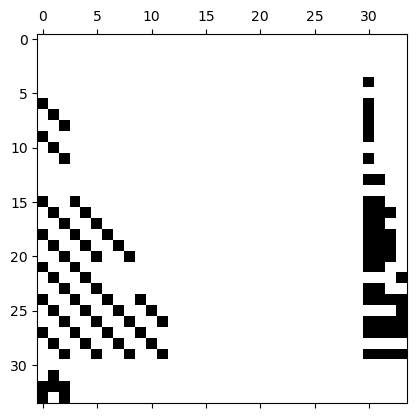

In [ ]:
plt.spy(mat.round(12))

In [ ]:
mat = np.array(["""0 0 0 0 0 0 -0.02 0 0 0.00666667 0 0 0 0 0 -0.01 0 0 0.00666667 0 0 0.00333333 0 0 0.00333333 0 0 -0.00333333 0 0 0 0 0 0 
0 0 0 0 0 0 0 -0.02 0 0 0.00666667 0 0 0 0 0 -0.01 0 0 0.00666667 0 0 0.00333333 0 0 0.00333333 0 0 -0.00333333 0 0 0 0 0 
0 0 0 0 0 0 0 0 -0.02 0 0 0.00666667 0 0 0 0 0 -0.01 0 0 0.00666667 0 0 0.00333333 0 0 0.00333333 0 0 -0.00333333 0 0 0 0 
0 0 0 0 0 0 0 0 0 -3.25261e-19 0 0 0 0 0 -0.018 0 0 -0.00133333 0 0 0.006 0 0 -0.000666667 0 0 0.000666667 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 -3.25261e-19 0 0 0 0 0 -0.018 0 0 -0.00133333 0 0 0.006 0 0 -0.000666667 0 0 0.000666667 0 -0.0266667 1.41115e-18 4.87046e-19 1.13757e-18 
0 0 0 0 0 0 0 0 0 0 0 -3.25261e-19 0 0 0 0 0 -0.018 0 0 -0.00133333 0 0 0.006 0 0 -0.000666667 0 0 0.000666667 0 0 0 0 
0 0 0 0 0 0 9.75782e-19 0 0 -3.25261e-19 0 0 0 0 0 -2.1684e-19 0 0 -0.0133333 0 0 -1.35525e-20 0 0 0.00333333 0 0 0.000666667 0 0 -0.02 4.16291e-19 4.42376e-19 8.76057e-19 
0 0 0 0 0 0 0 9.75782e-19 0 0 -3.25261e-19 0 0 0 0 0 -2.1684e-19 0 0 -0.0133333 0 0 -1.35525e-20 0 0 0.00333333 0 0 0.000666667 0 0.0133333 -7.05576e-19 -2.43523e-19 -5.68784e-19 
0 0 0 0 0 0 0 0 9.75782e-19 0 0 -3.25261e-19 0 0 0 0 0 -2.1684e-19 0 0 -0.0133333 0 0 -1.35525e-20 0 0 0.00333333 0 0 0.000666667 0.02 -4.16291e-19 -4.42376e-19 -8.76057e-19 
0 0 0 0 0 0 1.73472e-18 0 0 -6.50521e-19 0 0 0 0 0 4.87891e-19 0 0 -9.21572e-19 0 0 -1.21973e-19 0 0 -0.00333333 0 0 0.002 0 0 0.00666667 -3.52788e-19 -1.21762e-19 -2.84392e-19 
0 0 0 0 0 0 0 1.73472e-18 0 0 -6.50521e-19 0 0 0 0 0 4.87891e-19 0 0 -9.21572e-19 0 0 -1.21973e-19 0 0 -0.00333333 0 0 0.002 0 0 0 0 0 
0 0 0 0 0 0 0 0 1.73472e-18 0 0 -6.50521e-19 0 0 0 0 0 4.87891e-19 0 0 -9.21572e-19 0 0 -1.21973e-19 0 0 -0.00333333 0 0 0.002 0.00666667 -3.52788e-19 -1.21762e-19 -2.84392e-19 
0 0 0 0 0 0 -5.42101e-19 0 0 1.35525e-19 0 0 0 0 0 2.71051e-19 0 0 1.27394e-18 0 0 -4.74338e-19 0 0 3.65918e-19 0 0 -2.71051e-19 0 0 0 0 0 0 
0 0 0 0 0 0 0 -5.42101e-19 0 0 1.35525e-19 0 0 0 0 0 2.71051e-19 0 0 1.27394e-18 0 0 -4.74338e-19 0 0 3.65918e-19 0 0 -2.71051e-19 0 0.0166667 -0.03 -3.43785e-19 -5.60626e-19 
0 0 0 0 0 0 0 0 -5.42101e-19 0 0 1.35525e-19 0 0 0 0 0 2.71051e-19 0 0 1.27394e-18 0 0 -4.74338e-19 0 0 3.65918e-19 0 0 -2.71051e-19 0 0 0 0 
0 0 0 0 0 0 -1.6263e-19 0 0 4.06576e-20 0 0 0 0 0 3.52366e-19 0 0 -1.11131e-18 0 0 -2.37169e-19 0 0 -7.92823e-19 0 0 -1.28749e-19 0 0 -0.01 -0.018 3.57549e-19 4.11759e-19 
0 0 0 0 0 0 0 -1.6263e-19 0 0 4.06576e-20 0 0 0 0 0 3.52366e-19 0 0 -1.11131e-18 0 0 -2.37169e-19 0 0 -7.92823e-19 0 0 -1.28749e-19 0 0.00666667 0.012 -0.012 -2.83511e-19 
0 0 0 0 0 0 0 0 -1.6263e-19 0 0 4.06576e-20 0 0 0 0 0 3.52366e-19 0 0 -1.11131e-18 0 0 -2.37169e-19 0 0 -7.92823e-19 0 0 -1.28749e-19 0.01 0.018 -3.57549e-19 -4.11759e-19 
0 0 0 0 0 0 1.84314e-18 0 0 -6.77626e-19 0 0 0 0 0 -4.33681e-19 0 0 5.50233e-18 0 0 9.48677e-20 0 0 -1.80249e-18 0 0 1.35525e-20 0 0 0.00666667 -0.00133333 -0.0133333 4.67645e-20 
0 0 0 0 0 0 0 1.84314e-18 0 0 -6.77626e-19 0 0 0 0 0 -4.33681e-19 0 0 5.50233e-18 0 0 9.48677e-20 0 0 -1.80249e-18 0 0 1.35525e-20 0 -0.01 0.002 0.008 3.85975e-19 
0 0 0 0 0 0 0 0 1.84314e-18 0 0 -6.77626e-19 0 0 0 0 0 -4.33681e-19 0 0 5.50233e-18 0 0 9.48677e-20 0 0 -1.80249e-18 0 0 1.35525e-20 -0.00666667 0.00133333 0.0133333 -4.67645e-20 
0 0 0 0 0 0 4.33681e-19 0 0 -1.21973e-19 0 0 0 0 0 2.95445e-18 0 0 -1.35525e-19 0 0 -9.96111e-19 0 0 -2.50722e-19 0 0 1.96512e-19 0 0 0.00333333 0.006 -6.63809e-20 -1.47696e-19 
0 0 0 0 0 0 0 4.33681e-19 0 0 -1.21973e-19 0 0 0 0 0 2.95445e-18 0 0 -1.35525e-19 0 0 -9.96111e-19 0 0 -2.50722e-19 0 0 1.96512e-19 0 9.76276e-19 1.29418e-18 -1.02656e-18 -0.004 
0 0 0 0 0 0 0 0 4.33681e-19 0 0 -1.21973e-19 0 0 0 0 0 2.95445e-18 0 0 -1.35525e-19 0 0 -9.96111e-19 0 0 -2.50722e-19 0 0 1.96512e-19 0.00333333 0.006 -6.63809e-20 -1.47696e-19 
0 0 0 0 0 0 6.50521e-19 0 0 -2.43945e-19 0 0 0 0 0 -2.1684e-19 0 0 2.03288e-18 0 0 4.06576e-20 0 0 -9.62229e-19 0 0 2.57498e-19 0 0 0.00333333 -0.000666667 0.00333333 -0.00333333 
0 0 0 0 0 0 0 6.50521e-19 0 0 -2.43945e-19 0 0 0 0 0 -2.1684e-19 0 0 2.03288e-18 0 0 4.06576e-20 0 0 -9.62229e-19 0 0 2.57498e-19 0 -2.5331e-19 3.8968e-19 -1.11641e-18 0.00266667 
0 0 0 0 0 0 0 0 6.50521e-19 0 0 -2.43945e-19 0 0 0 0 0 -2.1684e-19 0 0 2.03288e-18 0 0 4.06576e-20 0 0 -9.62229e-19 0 0 2.57498e-19 0.00333333 -0.000666667 0.00333333 0.00333333 
0 0 0 0 0 0 8.13152e-19 0 0 -2.43945e-19 0 0 0 0 0 -5.42101e-20 0 0 -1.42302e-18 0 0 1.25361e-19 0 0 7.0812e-19 0 0 -1.21973e-19 0 0 -0.00333333 0.000666667 0.000666667 0.002 
0 0 0 0 0 0 0 8.13152e-19 0 0 -2.43945e-19 0 0 0 0 0 -5.42101e-20 0 0 -1.42302e-18 0 0 1.25361e-19 0 0 7.0812e-19 0 0 -1.21973e-19 0 -5.34761e-20 8.36643e-21 8.36643e-21 1.97837e-20 
0 0 0 0 0 0 0 0 8.13152e-19 0 0 -2.43945e-19 0 0 0 0 0 -5.42101e-20 0 0 -1.42302e-18 0 0 1.25361e-19 0 0 7.0812e-19 0 0 -1.21973e-19 0.00333333 -0.000666667 -0.000666667 0.002 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 -0.0266667 0 0 1.41115e-18 0 0 4.87046e-19 0 0 1.13757e-18 0 0 -4.44066e-19 0 0 4.19706e-19 0 0 1.63803e-18 0 0 5.28126e-19 0 0 6.41651e-19 0 0 1.54182e-19 0 0 0 0 0 
-0.02 0.0133333 0.02 4.16291e-19 -7.05576e-19 -4.16291e-19 4.42376e-19 -2.43523e-19 -4.42376e-19 8.76057e-19 -5.68784e-19 -8.76057e-19 -5.35507e-20 2.22033e-19 5.35507e-20 2.49129e-19 -2.09853e-19 -2.49129e-19 1.44536e-18 -8.19013e-19 -1.44536e-18 4.11759e-19 -2.64063e-19 -4.11759e-19 4.58357e-19 -3.20825e-19 -4.58357e-19 8.38674e-20 -7.70912e-20 -8.38674e-20 0 0 0 0 
0.00666667 0 0.00666667 -3.52788e-19 0 -3.52788e-19 -1.21762e-19 0 -1.21762e-19 -2.84392e-19 0 -2.84392e-19 1.11016e-19 0 1.11016e-19 -1.04926e-19 0 -1.04926e-19 -4.09507e-19 0 -4.09507e-19 -1.32032e-19 0 -1.32032e-19 -1.60413e-19 0 -1.60413e-19 -3.85456e-20 0 -3.85456e-20 0 0 0 0 
""".split()]).astype(float).reshape(34,34)

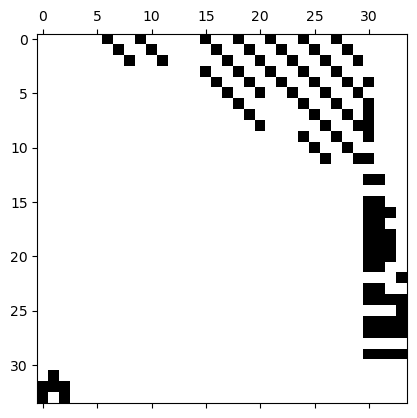

In [ ]:
plt.spy(mat.round(12))